In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as st
from itertools import *
plt.rcParams["figure.figsize"] = (12,8)
sns.set_style("darkgrid")

In [71]:
IEDB_tassays = pd.read_csv('tcell_table_export_1690005992.csv', dtype=object)
IEDB_tassays = IEDB_tassays[['Epitope - Name', 'MHC Restriction - Name','Assay - Method', 'Assay - Response measured', 'Assay - Units',
       'Assay - Qualitative Measurement', 'Assay - Quantitative measurement', 'Assay - Response Frequency (%)', 'Assay Antigen - Source Molecule']]
IEDB_tassays['Epitope - Name'] = IEDB_tassays['Epitope - Name'].str.split().str[0]
IEDB_tassays['Assay - Response Frequency (%)'] = IEDB_tassays['Assay - Response Frequency (%)'].astype(float)
IEDB_tassays = IEDB_tassays.loc[IEDB_tassays['MHC Restriction - Name'].str.len() == 11]
IEDB_tassays.groupby(by=['Assay - Response measured', 'Assay - Method']).count()

Epitope - Name  \
Assay - Response measured Assay - Method                                      
3D structure              x-ray crystallography                           6   
CCL4/MIP-1b release       ELISA                                           4   
                          ICS                                             2   
IFNg release              ELISA                                         261   
                          ELISPOT                                       594   
                          ICS                                           801   
IL-10 release             ELISA                                           1   
IL-13 release             ELISA                                           2   
IL-2 release              ELISA                                           2   
                          ICS                                             9   
IL-8 release              ELISA                                           2   
T cell binding            High throughput multiplexed assay             229   
TNF release               ICS                                            14   
TNFa release              ELISA                                           8   
                          ICS                                           180   
activation                biological activity                           523   
cytotoxicity              51 chromium                                    20   
                          in vitro assay                                 54   
degranulation             biological activity                            44   
dissociation constant KD  surface plasmon resonance (SPR)                29   
granzyme A release        intracellular staining                          2   
granzyme B release        ELISA                                           7   
                          intracellular staining                         12   
perforin release          intracellular staining                          3   
proliferation             CFSE                                           36   
                          biological activity                             1   
                          in vitro assay                                  2   
qualitative binding       binding assay                                   1   
                          multimer/tetramer                            2500   

                                                             MHC Restriction - Name  \
Assay - Response measured Assay - Method                                              
3D structure              x-ray crystallography                                   6   
CCL4/MIP-1b release       ELISA                                                   4   
                          ICS                                                     2   
IFNg release              ELISA                                                 261   
                          ELISPOT                                               594   
                          ICS                                                   801   
IL-10 release             ELISA                                                   1   
IL-13 release             ELISA                                                   2   
IL-2 release              ELISA                                                   2   
                          ICS                                                     9   
IL-8 release              ELISA                                                   2   
T cell binding            High throughput multiplexed assay                     229   
TNF release               ICS                                                    14   
TNFa release              ELISA                                                   8   
                          ICS                                                   180   
activation                biological activity                                   523   
cytotoxicity              51 chromium        

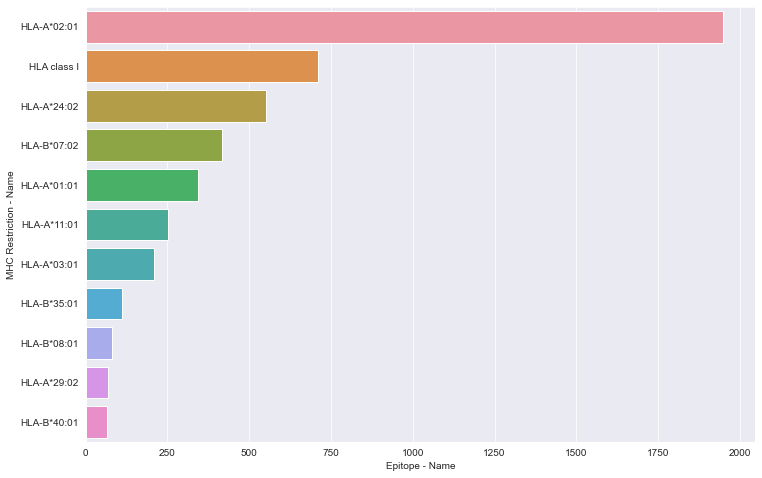

In [72]:
for_graph = IEDB_tassays.groupby('MHC Restriction - Name').count()
for_graph = for_graph.sort_values(by='Epitope - Name', ascending=False)
for_graph = for_graph.iloc[:11]
sns.barplot(x=for_graph['Epitope - Name'], y=for_graph.index)

columns = []
for_graph.sort_index(inplace=True)
for_graph = for_graph.loc[for_graph.index.str.startswith('HLA-')]
for s in ['R', 'B', 'N', 'S', 'M', 'F']:
    columns += list(for_graph.index+s)
    
IEDB_tassays = IEDB_tassays.loc[IEDB_tassays['MHC Restriction - Name'].isin(for_graph.index)]

In [73]:
IEDB_mhc_assays = pd.read_csv('mhc_ligand_table_export_1690006024.csv')
IEDB_mhc_assays = IEDB_mhc_assays[['Epitope - Name', 'MHC Restriction - Name','Assay - Method', 'Assay - Response measured', 'Assay - Units',
       'Assay - Qualitative Measurement', 'Assay - Quantitative measurement']]
IEDB_mhc_assays.replace({'Assay - Qualitative Measurement':{'Positive-High':1, 'Positive':1, 'Positive-Intermediate':0.5, 'Positive-Low':0.5, 'Negative':0}}, inplace=True)
IEDB_mhc_assays['Epitope - Name'] = IEDB_mhc_assays['Epitope - Name'].str.split().str[0]
IEDB_mhc_assays.groupby(by=['Assay - Response measured', 'Assay - Method']).count()

Epitope - Name  \
Assay - Response measured        Assay - Method                                           
3D structure                     x-ray crystallography                               21   
50% dissociation temperature     purified MHC/direct/fluorescence                    30   
dissociation constant KD (~IC50) purified MHC/competitive/radioactivity              70   
ligand presentation              cellular MHC/mass spectrometry                      54   
qualitative binding              binding assay                                       94   
                                 cellular MHC/competitive/fluorescence              141   
                                 cellular MHC/direct/fluorescence                   516   
                                 purified MHC                                       186   
                                 purified MHC/competitive/fluorescence               40   
                                 purified MHC/competitive/radioactivity             110   
                                 purified MHC/direct/fluorescence                     6   

                                                                         MHC Restriction - Name  \
Assay - Response measured        Assay - Method                                                   
3D structure                     x-ray crystallography                                       21   
50% dissociation temperature     purified MHC/direct/fluorescence                            30   
dissociation constant KD (~IC50) purified MHC/competitive/radioactivity                      70   
ligand presentation              cellular MHC/mass spectrometry                              54   
qualitative binding              binding assay                                               94   
                                 cellular MHC/competitive/fluorescence                      141   
                                 cellular MHC/direct/fluorescence                           516   
                                 purified MHC                                               186   
                                 purified MHC/competitive/fluorescence                       40   
                                 purified MHC/competitive/radioactivity                     110   
                                 purified MHC/direct/fluorescence                             6   

                                                                         Assay - Units  \
Assay - Response measured        Assay - Method                                          
3D structure                     x-ray crystallography                              21   
50% dissociation temperature     purified MHC/direct/fluorescence                   30   
dissociation constant KD (~IC50) purified MHC/competitive/radioactivity             70   
ligand presentation              cellular MHC/mass spectrometry                      0   
qualitative binding              binding assay                                       0   
                                 cellular MHC/competitive/fluorescence               0   
                                 cellular MHC/direct/fluorescence                    0   
                                 purified MHC                                        0   
                                 purified MHC/competitive/fluorescence               0   
                                 purified MHC/competitive/radioactivity              0   
                                 purified MHC/direct/fluorescence                    0   

                                                                         Assay - Qualitative Measurement  \
Assay - Response measured        Assay - Method                                                            
3D structure                     x-ray crystallography                                                21   
50% dissociation temperature     purified MHC/direct/fluorescence                                     30  

MannwhitneyuResult(statistic=285.5, pvalue=0.7090016564340355)
(0.5945945945945946, 0.5248549011063159)
[[22, 111], [1, 3]]


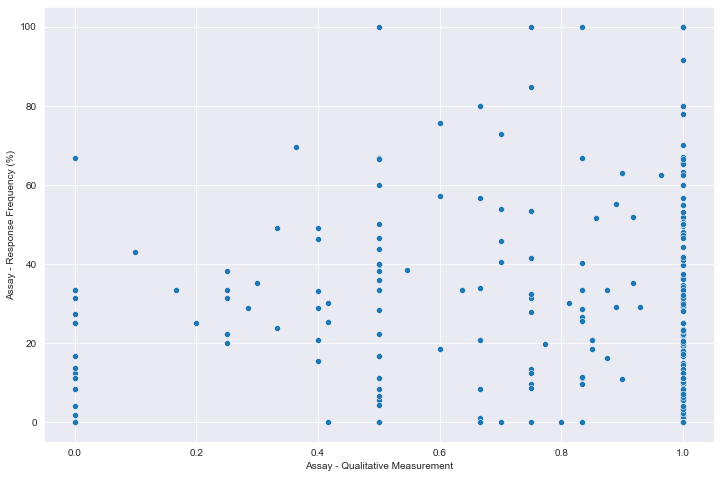

In [74]:
sns.scatterplot(y=IEDB_tassays.groupby(by=[IEDB_tassays['Epitope - Name']]).mean()['Assay - Response Frequency (%)'], x=IEDB_mhc_assays.groupby(by=[IEDB_mhc_assays['Epitope - Name']]).mean()['Assay - Qualitative Measurement'])
df = pd.concat([IEDB_mhc_assays.groupby(by=[IEDB_mhc_assays['Epitope - Name']]).mean()['Assay - Qualitative Measurement'], IEDB_tassays.groupby(by=[IEDB_tassays['Epitope - Name']]).mean()['Assay - Response Frequency (%)']], axis=1)
df = df.loc[(df['Assay - Response Frequency (%)']==0)|(df['Assay - Response Frequency (%)']>60)]
group1 = df.loc[df['Assay - Qualitative Measurement']==0]
group2 = df.loc[df['Assay - Qualitative Measurement']==1]
print(st.mannwhitneyu(group1['Assay - Response Frequency (%)'], group2['Assay - Response Frequency (%)']))
yes_yes = df.loc[(df['Assay - Response Frequency (%)']>60)&(df['Assay - Qualitative Measurement']==1)]
yes_no = df.loc[(df['Assay - Response Frequency (%)']>60)&(df['Assay - Qualitative Measurement']==0)]
no_yes = df.loc[(df['Assay - Response Frequency (%)']==0)&(df['Assay - Qualitative Measurement']==1)]
no_no = df.loc[(df['Assay - Response Frequency (%)']==0)&(df['Assay - Qualitative Measurement']==0)]

print(st.fisher_exact([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]]))
print([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]])

In [75]:
netmhc=pd.read_csv('4115972_NetMHCpan.tsv', sep='\t', index_col='Unnamed: 1', low_memory=False)
Rank = netmhc.iloc[1:,5::6].astype(float)
Rank.columns=columns[20:30]

In [76]:
stab = pd.read_csv('316699_NetMHCstabpan.tsv', sep='\t', low_memory=False)[['HLA-A01:01','HLA-A02:01','HLA-A03:01','HLA-A11:01','HLA-A24:02','HLA-A29:02','HLA-B07:02','HLA-B08:01','HLA-B35:01','HLA-B40:01']].iloc[1:,:]
stab.columns=columns[30:40]
stab = stab.reset_index().set_index('level_1')
stab = stab.drop(columns='level_0')
stab = stab.astype(float)

In [77]:
flurry = pd.read_csv('results_flurry.csv')

In [78]:
MixMHC = pd.read_csv('resultsMix.csv', comment='#', sep='\t')[['Peptide', '%Rank_A0101','%Rank_A0201','%Rank_A0301','%Rank_A1101','%Rank_A2402','%Rank_A2902','%Rank_B0702','%Rank_B0801','%Rank_B3501','%Rank_B4001']]
MixMHC.columns=['Epitope - Name']+columns[40:50]
MixMHC = MixMHC.set_index('Epitope - Name')

In [79]:
all_analysis=pd.DataFrame(np.nan, index=IEDB_tassays['Epitope - Name'].unique(), columns=columns).astype(float)

for allele in columns[:10]:
    search = IEDB_tassays.loc[IEDB_tassays['MHC Restriction - Name']==allele[:-1]]
    search = search[['Epitope - Name', 'Assay - Response Frequency (%)']].groupby(by='Epitope - Name').mean()
    search.rename(columns={'Assay - Response Frequency (%)':allele}, inplace=True)
    all_analysis[allele].fillna(search[allele], inplace=True)
    
for allele in columns[10:20]:
    search = IEDB_mhc_assays.loc[IEDB_mhc_assays['MHC Restriction - Name']==allele[:-1]]
    search = search[['Epitope - Name', 'Assay - Qualitative Measurement']].groupby(by='Epitope - Name').mean()
    search.rename(columns={'Assay - Qualitative Measurement':allele}, inplace=True)
    all_analysis[allele].fillna(search[allele], inplace=True)
    
for allele in Rank.columns:
    search = np.log2(Rank[allele]/0.5)
    all_analysis[allele].fillna(search.drop_duplicates(keep='first'), inplace=True)
    
for allele in stab.columns:
    search = np.log2(stab[allele]/0.5)
    all_analysis[allele].fillna(search.drop_duplicates(keep='first'), inplace=True)
    
for allele in columns[40:50]:
    search = np.log2(MixMHC[allele]/0.5)
    all_analysis[allele].fillna(search, inplace=True)

for allele in columns[50:]:
    allele_s = allele.replace('*', '')
    allele_s = allele_s.replace(':', '')
    search = flurry.loc[flurry['allele']==allele_s[:-1]]
    search['mhcflurry_affinity_percentile']=np.log2(search['mhcflurry_affinity_percentile']/0.5)
    search = search.rename(columns={'mhcflurry_affinity_percentile':allele, 'peptide':'Epitope - Name'}).set_index('Epitope - Name')
    all_analysis[allele].fillna(search[allele].drop_duplicates(keep='first'), inplace=True)

/var/folders/0_/znp0d06552z733wgrkk7s8rw0000gp/T/ipykernel_26579/2500352453.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search['mhcflurry_affinity_percentile']=np.log2(search['mhcflurry_affinity_percentile']/0.5)
/var/folders/0_/znp0d06552z733wgrkk7s8rw0000gp/T/ipykernel_26579/2500352453.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search['mhcflurry_affinity_percentile']=np.log2(search['mhcflurry_affinity_percentile']/0.5)
/var/folders/0_/znp0d06552z733wgrkk7s8rw0000gp/T/ipykernel_26579/250

In [20]:
all_analysis.to_csv('all_analysis.csv')

In [21]:
for allele in for_graph.index:
    yes_yes = all_analysis.loc[(all_analysis[allele+'R']>60)&(all_analysis[allele+'B']==1)]
    yes_no = all_analysis.loc[(all_analysis[allele+'R']>60)&(all_analysis[allele+'B']==0)]
    no_yes = all_analysis.loc[(all_analysis[allele+'R']==0)&(all_analysis[allele+'B']==1)]
    no_no = all_analysis.loc[(all_analysis[allele+'R']==0)&(all_analysis[allele+'B']==0)]

    print(st.fisher_exact([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]]))
    print([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]])

(nan, 1.0)
[[0, 5], [0, 0]]
(0.5294117647058824, 0.5179810503328527)
[[18, 68], [1, 2]]
(nan, 1.0)
[[2, 27], [0, 0]]
(nan, 1.0)
[[3, 27], [0, 0]]
(0.42857142857142855, 0.5087719298245603)
[[3, 14], [1, 2]]
(nan, 1.0)
[[1, 0], [0, 0]]
(nan, 1.0)
[[3, 0], [3, 0]]
(nan, 1.0)
[[0, 0], [0, 0]]
(nan, 1.0)
[[1, 1], [0, 0]]
(nan, 1.0)
[[2, 0], [0, 0]]


In [22]:
for allele in for_graph.index:
    df = all_analysis.loc[(all_analysis[allele+'R']==0)|(all_analysis[allele+'R']>60)]
    group1 = df.loc[df[allele+'B']==0]
    group2 = df.loc[df[allele+'B']==1]
    if group1.empty|group2.empty:
        print(allele)
    else:
        print(allele)
        print(st.mannwhitneyu(group1[allele+'R'], group2[allele+'R']))
        print(st.ttest_ind(group1[allele+'R'], group2[allele+'R']))

HLA-A*01:01
HLA-A*02:01
MannwhitneyuResult(statistic=143.0, pvalue=0.6682955772480859)
Ttest_indResult(statistic=0.3151453739356342, pvalue=0.7534059285998671)
HLA-A*03:01
HLA-A*11:01
HLA-A*24:02
MannwhitneyuResult(statistic=30.0, pvalue=0.5447441364957561)
Ttest_indResult(statistic=0.4741304027388633, pvalue=0.6411075317571029)
HLA-A*29:02
HLA-B*07:02
MannwhitneyuResult(statistic=1.0, pvalue=0.16415972847851523)
Ttest_indResult(statistic=-2.016259534131171, pvalue=0.11398255267991358)
HLA-B*08:01
HLA-B*35:01
HLA-B*40:01


In [33]:
for allele in for_graph.index:
    for i in ['N', 'S', 'M', 'F']:
        df1 = all_analysis.loc[all_analysis[allele+'B'] == 0][allele+i]
        df2 = all_analysis.loc[all_analysis[allele+'B'] == 1][allele+i]
        if not df1.dropna().empty|df2.dropna().empty:
            pval = st.mannwhitneyu(df1.dropna(), df2.dropna(), alternative='greater')[1]

            sns.boxplot(data=[df1,df2])
            plt.ylabel('Score')
            plt.xlabel('Presentation status')
            plt.title(allele+i)
            plt.tight_layout()
            plt.savefig('./presentation_predict/presentation_'+allele+i+'.png')
            plt.close()

In [14]:
for allele in for_graph.index:
    for i in ['N', 'S', 'M', 'F']:
        yes_yes = all_analysis.loc[(all_analysis[allele+'B']==1)&(all_analysis[allele+i]<=0)]
        yes_no = all_analysis.loc[(all_analysis[allele+'B']==1)&(all_analysis[allele+i]>0)]
        no_yes = all_analysis.loc[(all_analysis[allele+'B']==0)&(all_analysis[allele+i]<=0)]
        no_no = all_analysis.loc[(all_analysis[allele+'B']==0)&(all_analysis[allele+i]>0)]

        if st.fisher_exact([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]])[1]<0.05:
                print(allele+i)
                print(st.fisher_exact([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]]))
                print([[len(yes_yes), len(no_yes)],[len(yes_no), len(no_no)]])

HLA-A*01:01N
(85.0, 4.0616474335099085e-06)
[[15, 1], [3, 17]]
HLA-A*01:01M
(27.2, 3.353162128613096e-05)
[[16, 5], [2, 17]]
HLA-A*01:01F
(45.0, 0.00027325839682819126)
[[15, 3], [1, 9]]
HLA-A*02:01N
(4.45945945945946, 0.004623847653547589)
[[60, 4], [74, 22]]
HLA-A*02:01M
(4.223300970873787, 0.007269220205968931)
[[60, 4], [103, 29]]
HLA-A*03:01F
(inf, 0.00047415836889521203)
[[34, 1], [0, 3]]
HLA-A*11:01N
(inf, 0.042857142857142816)
[[44, 0], [10, 2]]
HLA-A*24:02N
(9.5, 0.00835057090702735)
[[38, 4], [5, 5]]
HLA-A*24:02M
(10.75, 0.02812829050342907)
[[43, 6], [2, 3]]
HLA-B*07:02M
(inf, 0.0033138672599184286)
[[6, 0], [8, 18]]


In [172]:
for allele in for_graph.index:
    for i in ['N', 'S', 'M', 'F']:
        df1 = all_analysis.loc[all_analysis[allele+'R'] == 0][allele+i]
        df2 = all_analysis.loc[all_analysis[allele+'R'] > 60][allele+i]
        if not df1.dropna().empty|df2.dropna().empty:
            pval = st.mannwhitneyu(df1.dropna(), df2.dropna(), alternative='greater')[1]
            if pval < 0.05:
                sns.boxplot(data=[df1,df2])
                plt.ylabel('Score')
                plt.xlabel('Immunogenicity status')
                plt.title(allele+i)
                plt.tight_layout()
                plt.savefig('./immunogenicity_predict/T_response_'+allele+i+'.png')
                plt.close()

0.025193117322017004


In [173]:
thebest = 1
bestall = []
theworst = 0
worstall = []

for allele in for_graph.index:
    for i in combinations('NSMF', 2):
            df = all_analysis.loc[(all_analysis[allele+i[0]].notna())&(all_analysis[allele+i[1]].notna())]
            cor = st.spearmanr(df[allele+i[0]], df[allele+i[1]])[0]
            pval = st.spearmanr(df[allele+i[0]], df[allele+i[1]])[1]
            if pval< 0.05:
                sns.scatterplot(x=df[allele+i[0]], y=df[allele+i[1]])
                plt.axvline(x=0)
                plt.axhline(y=0)
                plt.axvline(x=2, linestyle='--')
                plt.axhline(y=2, linestyle='--')
                plt.title('Correlation of '+allele+i[0]+' + '+allele+i[1])
                plt.tight_layout()
                plt.savefig('./methods_correlation/'+allele+i[0]+'+'+allele+i[1]+'.png')
                plt.close()
            if pval < thebest:
                thebest = pval
                bestall = [allele+i[0], allele+i[1]]
                corbest = cor
            if pval > theworst:
                theworst= pval
                worstall = [allele+i[0], allele+i[1]]
                corworst = cor

print(thebest)
print(bestall)
print(theworst)
print(worstall)
print(corbest)
print(corworst)

1.8266447437020153e-261
['HLA-A*02:01N', 'HLA-A*02:01M']
0.043381548380330745
['HLA-A*02:01S', 'HLA-A*02:01M']
0.8766250274092491
0.4156521739130434


In [80]:
GPNI = pd.DataFrame()
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'B']==1)&(all_analysis[allele+'R']==0)&(all_analysis[allele+'N']<=0)]
    GPNI = pd.concat([GPNI, result])
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'B']==1)&(all_analysis[allele+'R']==0)&(all_analysis[allele+'S']<=0)]
    GPNI = pd.concat([GPNI, result])
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'B']==1)&(all_analysis[allele+'R']==0)&(all_analysis[allele+'F']<=0)]
    GPNI = pd.concat([GPNI, result])
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'B']==1)&(all_analysis[allele+'R']==0)&(all_analysis[allele+'M']<=0)]
    GPNI = pd.concat([GPNI, result])

In [81]:
GPNI = GPNI.drop_duplicates(keep='first')
GPNI = GPNI.reset_index(drop=False)
GPNI.to_csv('GPNI.csv')

70.5


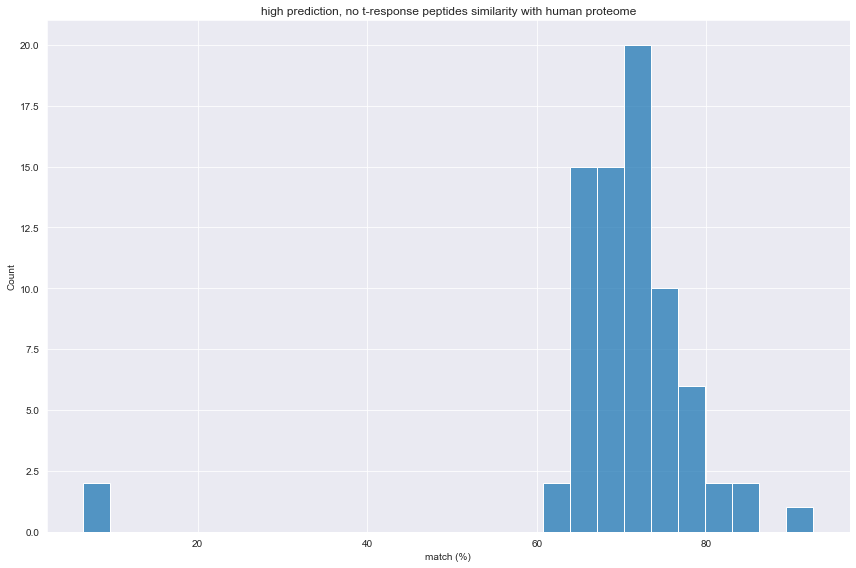

In [138]:
GPNI_sim = pd.read_csv('res_proteome_GPNI.csv', dtype=str, header=None).iloc[0,1:].str.split('.', expand=True).iloc[:,[1,5]]
GPNI_sim.columns = ['sequence', 'match (%)']
GPNI_sim['match (%)'] = GPNI_sim['match (%)'].str[:3].astype(float)
GPNI_sim['match (%)']= np.round(GPNI_sim['match (%)']/10, decimals=2)
print(np.median(GPNI_sim['match (%)']))
sns.histplot(data=GPNI_sim['match (%)'])
GPNI['seq_h'] = GPNI_sim['sequence']
GPNI['sim_h'] = GPNI_sim['match (%)']
plt.title('high prediction, no t-response peptides similarity with human proteome')
plt.tight_layout()

In [117]:
GPNI_res = pd.read_csv('res_GPNI.csv', dtype=str, header=None)
GPNI_res = GPNI_res.iloc[0].str.split('.', expand=True).iloc[:,[1,5]].dropna()
GPNI_res[5]=GPNI_res[5].str[:2]
GPNI_res = GPNI_res.replace('', 100)
GPNI_res[5] = GPNI_res[5].astype(float)
GPNI_res = GPNI_res.reset_index()
GPNI['TCEM'] = GPNI_res[1]
GPNI['TCEM_sim_h'] = GPNI_res[5]

5.0


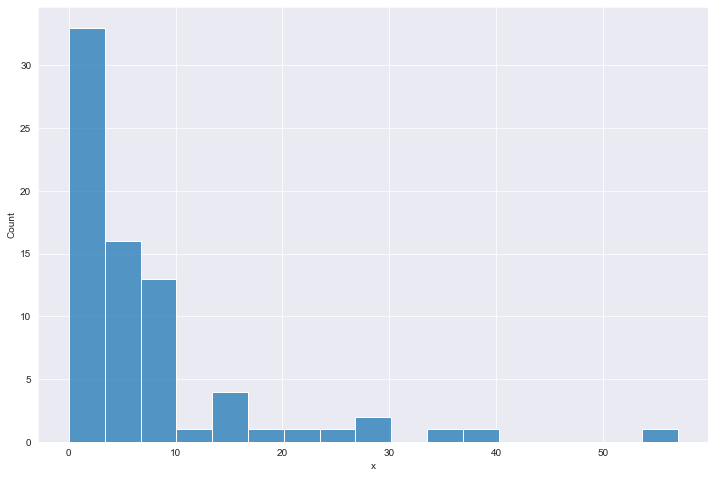

In [118]:
GPNI.set_index('TCEM')
GPNI_freq = pd.read_csv('tcemfreq_GPNI.csv')
print(np.median(GPNI_freq['x']))
sns.histplot(data=GPNI_freq['x'])
GPNI['freq'] = GPNI_freq['x']

In [128]:
BPBR = pd.DataFrame()
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'R']==0)&(all_analysis[allele+'N']>2)]
    BPBR = pd.concat([BPBR, result])
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'R']==0)&(all_analysis[allele+'S']>2)]
    BPBR = pd.concat([BPBR, result])
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'R']==0)&(all_analysis[allele+'F']>2)]
    BPBR = pd.concat([BPBR, result])
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'R']==0)&(all_analysis[allele+'M']>2)]
    BPBR = pd.concat([BPBR, result])

In [129]:
BPBR = BPBR.drop_duplicates(keep='first')
BPBR = BPBR.reset_index(drop=False)
BPBR.to_csv('BPBR.csv')

In [158]:
BPBR

,index,HLA-A*01:01R,HLA-A*02:01R,HLA-A*03:01R,HLA-A*11:01R,HLA-A*24:02R,HLA-A*29:02R,HLA-B*07:02R,HLA-B*08:01R,HLA-B*35:01R,...,HLA-A*03:01F,HLA-A*11:01F,HLA-A*24:02F,HLA-A*29:02F,HLA-B*07:02F,HLA-B*08:01F,HLA-B*35:01F,HLA-B*40:01F,seq_h,sim_h
0,FLLNKEMYL,0.000000,38.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.504271,NaN,1.733246,2.025383,2.758090,-2.195946,3.940026,NaN,NaN,NaN
1,KLWAQCVQL,0.000000,44.264000,NaN,NaN,NaN,NaN,26.65,NaN,NaN,...,2.188876,3.700051,1.483364,2.309831,2.651167,1.728356,NaN,NaN,FLFNKEMIL,74.7
2,KTFPPTEPK,NaN,0.000000,60.538462,81.66,NaN,NaN,NaN,NaN,NaN,...,-7.210897,-6.539520,3.836783,2.481170,NaN,5.074206,4.083341,4.354188,KLWGQSIQL,72.7
3,PTDNYITTY,53.813333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.913368,3.496750,NaN,0.778419,NaN,4.314986,1.447976,NaN,RSFPPTQPS,72.5
4,GTDLEGNFY,40.127273,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.245229,2.632326,NaN,0.757450,NaN,5.298429,2.491597,NaN,PTSNYFTTV,67.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,YSYATHSDK,NaN,NaN,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,-0.331427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RLLSMFGLK,71.2
83,SMMGFKMNY,NaN,NaN,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,-1.962969,0.120684,2.547450,-7.321928,NaN,NaN,0.902074,NaN,YLYATNSDN,64.6
84,RLYYDSMSY,NaN,NaN,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,...,-2.739372,0.649845,NaN,-2.870387,NaN,NaN,NaN,NaN,GKLGFKVNY,65.3
85,HLYLQYIRK,NaN,NaN,0.000000,0.00,0.0,NaN,NaN,NaN,NaN,...,NaN,-0.752072,NaN,3.892537,6.685211,NaN,NaN,NaN,RLYFDEISF,68.7


In [107]:
BPBR_res = pd.read_csv('res_BPBR.csv', dtype=str, header=None)
BPBR_res = BPBR_res.iloc[0].str.split('.', expand=True).iloc[:,[1,5]].dropna()
BPBR_res[5]=BPBR_res[5].str[:2]
BPBR_res = BPBR_res.replace('', 100)
BPBR_res[5] = BPBR_res[5].astype(float)
BPBR_res = BPBR_res.reset_index()
BPBR['TCEM'] = BPBR_res[1]
BPBR['TCEM_sim_h'] = BPBR_res[5]

71.2


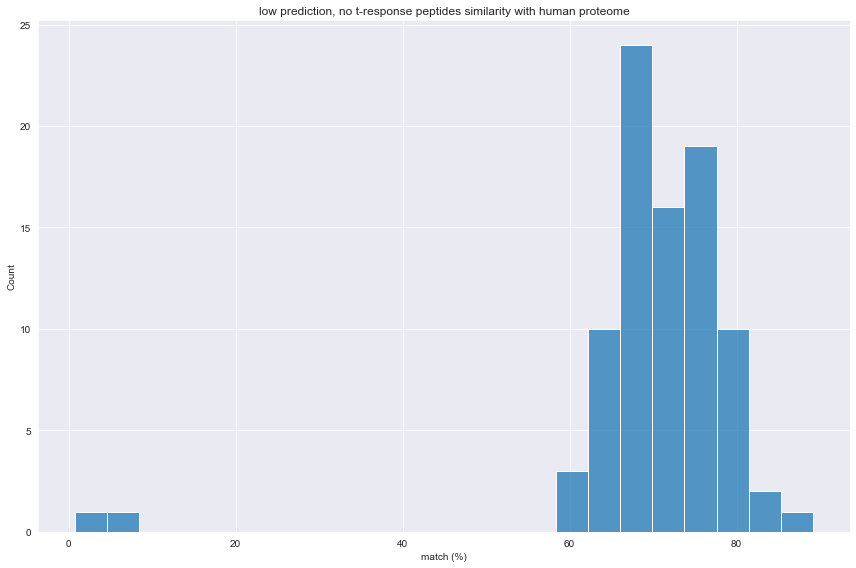

In [130]:
BPBR_sim = pd.read_csv('res_proteome_BPBR.csv', dtype=str, header=None).iloc[0,1:].str.split('.', expand=True).iloc[:,[1,5]]
BPBR_sim.columns = ['sequence', 'match (%)']
BPBR_sim['match (%)'] = BPBR_sim['match (%)'].str[:3].astype(float)
BPBR_sim['match (%)']= np.round(BPBR_sim['match (%)']/10, decimals=2)
print(np.median(BPBR_sim['match (%)']))
sns.histplot(data=BPBR_sim['match (%)'])
BPBR['seq_h'] = BPBR_sim['sequence']
BPBR['sim_h'] = BPBR_sim['match (%)']
plt.title('low prediction, no t-response peptides similarity with human proteome')
plt.tight_layout()

4.0


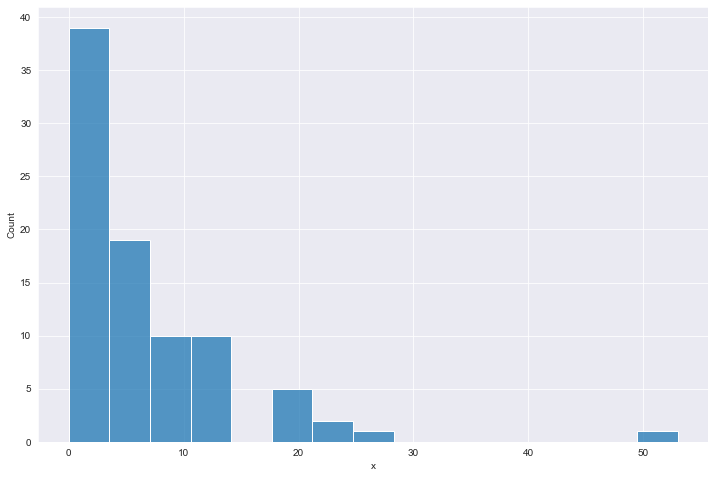

In [109]:
BPBR.set_index('TCEM')
BPBR_freq = pd.read_csv('tcemfreq_BPBR.csv')
print(np.median(BPBR_freq['x']))
sns.histplot(data=BPBR_freq['x'])
BPBR['freq'] = BPBR_freq['x']

In [131]:
EXAMP = pd.DataFrame()
for allele in for_graph.index:
    result=all_analysis.loc[(all_analysis[allele+'R']==100)]
    EXAMP = pd.concat([EXAMP, result])
EXAMP

,HLA-A*01:01R,HLA-A*02:01R,HLA-A*03:01R,HLA-A*11:01R,HLA-A*24:02R,HLA-A*29:02R,HLA-B*07:02R,HLA-B*08:01R,HLA-B*35:01R,HLA-B*40:01R,...,HLA-A*01:01F,HLA-A*02:01F,HLA-A*03:01F,HLA-A*11:01F,HLA-A*24:02F,HLA-A*29:02F,HLA-B*07:02F,HLA-B*08:01F,HLA-B*35:01F,HLA-B*40:01F
FLYENAFLP,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.068317,4.054002,NaN,NaN,4.094489,NaN,NaN,NaN,NaN
RTATKAYNV,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.293518,NaN,3.085255,NaN,NaN,NaN,NaN,NaN,NaN
IIWFLLLSV,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.846195,3.301039,NaN,NaN,NaN,NaN,2.973887,NaN,NaN
TIWFLLLSV,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.941482,NaN,NaN
VTWFHAIHV,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899031,-0.234890,NaN,2.654436,2.990864,NaN,NaN,NaN,NaN,NaN
KQIYKTPPI,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.139236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.104085
GINASVVNI,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GINASFVNI,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IAMACLVGL,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.281847,NaN,NaN,1.994037,NaN,1.275305,0.977280,0.867501,NaN
TAMACLVGL,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.572405,NaN,NaN,NaN,NaN,1.029276,NaN,NaN,NaN


In [132]:
EXAMP = EXAMP.drop_duplicates(keep='first')
EXAMP= EXAMP.reset_index(drop=False)
EXAMP.to_csv('EXAMPLE.csv')

73.55


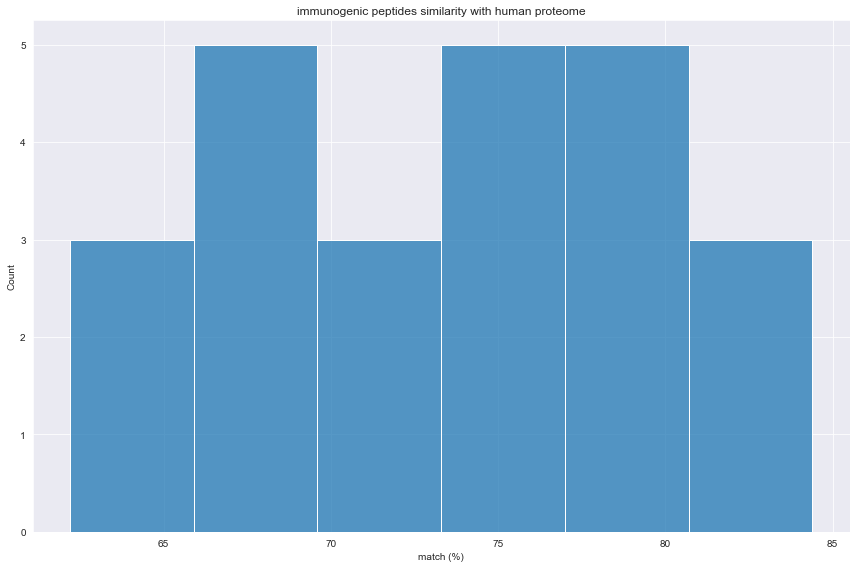

In [133]:
Examp_sim = pd.read_csv('res_proteome_EXAMPLE.csv', dtype=str, header=None).iloc[0,1:].str.split('.', expand=True).iloc[:,[1,5]]
Examp_sim.columns = ['sequence', 'match (%)']
Examp_sim['match (%)'] = Examp_sim['match (%)'].str[:3].astype(float)
Examp_sim['match (%)']= np.round(Examp_sim['match (%)']/10, decimals=2)
print(np.median(Examp_sim['match (%)']))
sns.histplot(data=Examp_sim['match (%)'])
EXAMP['seq_h'] = Examp_sim['sequence']
EXAMP['sim_h'] = Examp_sim['match (%)']
plt.title('immunogenic peptides similarity with human proteome')
plt.tight_layout()

In [130]:
EXAMP_res = pd.read_csv('res_EXAMP.csv', dtype=str, header=None)
EXAMP_res = EXAMP_res.iloc[0].str.split('.', expand=True).iloc[:,[1,5]].dropna()
EXAMP_res[5]=EXAMP_res[5].str[:2]
EXAMP_res = EXAMP_res.replace('', 100)
EXAMP_res[5] = EXAMP_res[5].astype(float)
EXAMP_res = EXAMP_res.reset_index()
EXAMP['TCEM'] = EXAMP_res[1]
EXAMP['TCEM_sim_h'] = EXAMP_res[5]

6.0


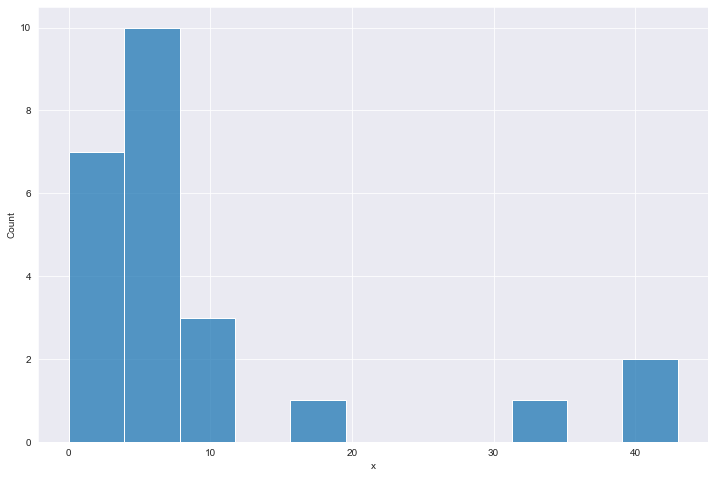

In [131]:
EXAMP_freq = pd.read_csv('tcemfreq_EXAMPLE.csv')
print(np.median(EXAMP_freq['x']))
sns.histplot(data=EXAMP_freq['x'])
EXAMP['freq'] = EXAMP_freq['x']

In [132]:
print(st.mannwhitneyu(BPBR['freq'], EXAMP_freq['x']))
print(st.mannwhitneyu(GPNI['freq'], EXAMP_freq['x']))
print(st.mannwhitneyu(BPBR['freq'], GPNI['freq']))

MannwhitneyuResult(statistic=933.5, pvalue=0.42852665961631486)
MannwhitneyuResult(statistic=790.0, pvalue=0.3696844801381818)
MannwhitneyuResult(statistic=3277.0, pvalue=0.9623568932693597)


In [133]:
print(st.fisher_exact([[len(EXAMP_freq[EXAMP_freq['x']>=4]), len(EXAMP_freq[EXAMP_freq['x']<4])],[len([BPBR.loc[BPBR['freq']>=4]]), len([BPBR.loc[BPBR['freq']<4]])]]))
print(st.fisher_exact([[len(EXAMP_freq[EXAMP_freq['x']>=4]), len(EXAMP_freq[EXAMP_freq['x']<4])],[len([GPNI.loc[GPNI['freq']>=4]]), len([GPNI.loc[GPNI['freq']<4]])]]))

(2.4285714285714284, 0.5292307692307678)
(2.4285714285714284, 0.5292307692307678)


In [48]:
f = open("epitopes_GPNI.csv", "w")
for name in GPNI['index'].unique():
    f.write(name+'\n')
    print(name, end=' ')
f.close()
f = open("epitopes_BPBR.csv", "w")
for name in BPBR['index'].unique():
    f.write(name+'\n')
    print(name, end=' ')
f.close()
f = open("epitopes_EXAMP.csv", "w")
for name in EXAMP['index'].unique():
    f.write(name+'\n')
    print(name, end=' ')
f.close()

VTDVTQLYL FLTENLLLY ISDYDYYRY VVDKYFDCY LTNDNTSRY TLVPQEHYV TLGVLVPHV YLNTLTLAV YTMADLVYA HTIDGSPGV FLLPSLAAV FLARGVVFM VLNDIFSRL FVSEEIGTL KLLEEWNLV RLISMMGFK STFNVPMEK KSAAEASKK VVNARLRAK MSYYCKSHK ITPVHVMSK LLNKEMYLK RQFHQKLLK IINNTVYTK GVAMPNLYK TLKGGAPTK TIFKDASGK ALCTFLLNK TMLFTMLRK ALRANSAVK ALAYYNTTK VLSGHNLAK TTIKPVTYK AVAKHDFFK MTNRQFHQK HLYLQYIRK TLKSFTVEK QIYKTPPIK KSTNLVKNK KLFAAETLK SVLNDILSR IQITISSFK AVLQSGFRK HVVGPNVNK TSFGPLVRK LVASIKNFK AIDAYPLTK AQCFKMFYK HLMGWDYPK QTFFKLVNK AQALNTLVK FYLTNDVSF VYSVIYLYL RYMNSQGLL DYVYNPFMI RYKLEGYAF NYLKRRVVF FFASFYYVW TYKPNTWCI FYGGWHNML IYNDKVAGF AYANSVFNI VYSTGSNVF QYGSFCTQL LPNNTASWF GLCVDIPGI YSYATHSDK IMASLVLAR MTSCCSCLK ALGGSVAIK KVKYLYFIK LLMPLKAPK IITTHNTFV CIDIGNYTV KYTQLCQYL FLLNKEMYL KLWAQCVQL KTFPPTEPK PTDNYITTY GTDLEGNFY ALNTPKDHI VATSRTLSY FYLTNDVSF MFLARGIVF AYILFTRFF KRVDWTIEY KVGGNYNYL GAIKSAPLI KQLSSNFGA ILPDPSKPS DLPQGFSAL TTRTQLPPA TTRTQLPSA TIYTELEPP TVYTELEPP YLYRLFRKS YLTPGDSSS YLTPGGSSS HINCYDYCI KGFNCYFPL 

In [147]:
tcr_gpni = pd.read_csv('resultsPrime_GPNI.csv', comment='#', sep='\t')

In [148]:
tcr_examp = pd.read_csv('resultsPrime_EXAMP.csv', comment='#', sep='\t')

In [149]:
tcr_bpbr = pd.read_csv('resultsPrime_BPBR.csv', comment='#', sep='\t')

In [150]:
tcr_gpni['%Rank_bestAllele'] = np.log2(tcr_gpni['%Rank_bestAllele']/0.5)
tcr_examp['%Rank_bestAllele'] = np.log2(tcr_examp['%Rank_bestAllele']/0.5)
tcr_bpbr['%Rank_bestAllele'] = np.log2(tcr_bpbr['%Rank_bestAllele']/0.5)

In [151]:
print(st.mannwhitneyu(tcr_gpni['%Rank_bestAllele'], tcr_examp['%Rank_bestAllele']))
print(st.mannwhitneyu(tcr_bpbr['%Rank_bestAllele'], tcr_examp['%Rank_bestAllele']))
print(st.mannwhitneyu(tcr_gpni['%Rank_bestAllele'], tcr_bpbr['%Rank_bestAllele']))

MannwhitneyuResult(statistic=538.5, pvalue=0.0032007363217566214)
MannwhitneyuResult(statistic=1525.5, pvalue=0.0005697387171227143)
MannwhitneyuResult(statistic=1182.0, pvalue=2.8090534102250287e-12)


Text(0.5, 1.0, 'Prime prediction for high predicted peptides vs immunogenic epitopes')

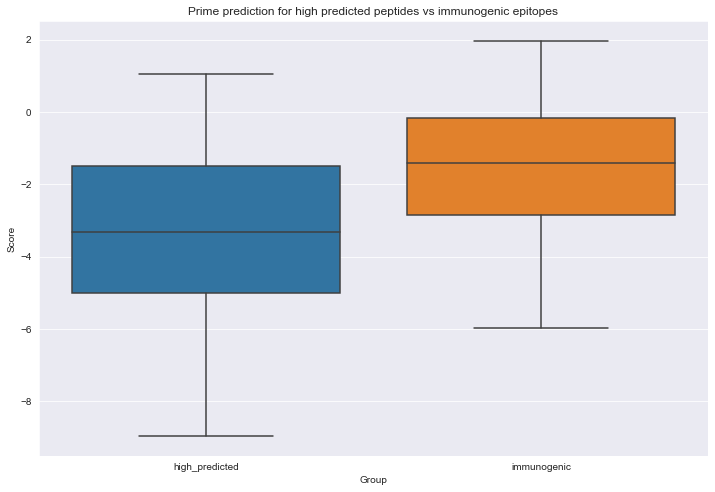

In [168]:
sns.boxplot(data=[tcr_gpni['%Rank_bestAllele'], tcr_examp['%Rank_bestAllele']])
plt.ylabel('Score')
plt.xlabel('Group')
plt.xticks(ticks=[0,1], labels=['high_predicted', 'immunogenic'])
plt.title('Prime prediction for high predicted peptides vs immunogenic epitopes')

Text(0.5, 1.0, 'Prime prediction for low predicted peptides vs immunogenic epitopes')

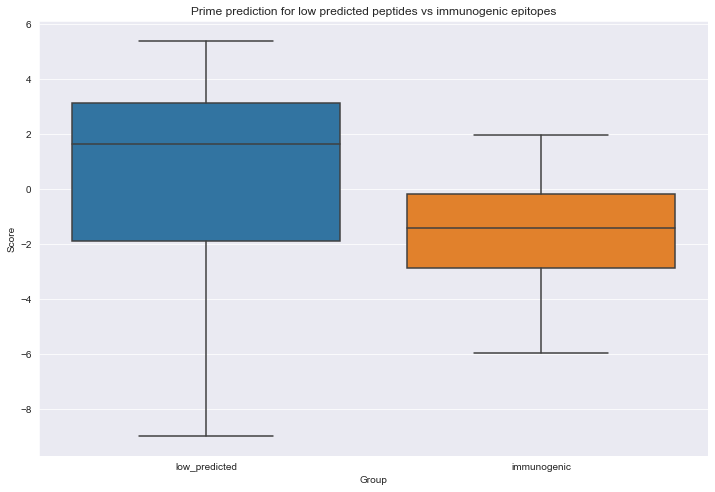

In [167]:
sns.boxplot(data=[tcr_bpbr['%Rank_bestAllele'], tcr_examp['%Rank_bestAllele']])
plt.ylabel('Score')
plt.xlabel('Group')
plt.xticks(ticks=[0,1], labels=['low_predicted', 'immunogenic'])
plt.title('Prime prediction for low predicted peptides vs immunogenic epitopes')